In [54]:
import os
current_directory = os.getcwd()
if os.path.basename(os.getcwd()) != "neural-spx-vix-calibration":
    # Get the parent directory
    parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
    # Change the working directory to the parent directory
    os.chdir(parent_directory)
print(os.getcwd())

C:\Users\Martial\neural-spx-vix-calibration


In [55]:
import os
import json
import torch
from src.smile import Smile
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
from tqdm import tqdm
plt.style.use("seaborn-v0_8")

In [56]:
name = "spx_vix_small"
path = os.path.join("checkpoints", f"{name}")
print(path)
print(os.getcwd())

files = glob.glob(f"{path}/*.json")
files = sorted(files, key=os.path.getmtime)
last = files[-1]

checkpoints\spx_vix_small
C:\Users\Martial\neural-spx-vix-calibration


In [57]:
last

'checkpoints\\spx_vix_small\\158.json'

In [58]:
def get_smile(maturity, smile):
    data = {
        "strikes" : torch.tensor(smile["strikes"]),
        "fwd" : torch.tensor(smile["fwd"]),
        "fwd_ask" : torch.tensor(smile["fwd_ask"]),
        "fwd_bid" : torch.tensor(smile["fwd_bid"]),
        "mids" : torch.tensor(smile["mids"]),
        "asks" : torch.tensor(smile["asks"]),
        "bids" : torch.tensor(smile["bids"]),
        "calls" : torch.tensor(smile["calls"]),
        "puts" : torch.tensor(smile["puts"])

    }
    return Smile(smile["name"], maturity, data)

In [59]:
def plot(file):
    with open(file) as f:
        checkpoint = json.load(f)
    maturities = checkpoint["smiles"]
    plt.figure(figsize=(10, 5 * len(maturities)))

    for k, (maturity, data) in enumerate(checkpoint["smiles"].items()):
        for i, (instrument, smile) in enumerate(data.items()):
            plt.subplot(len(maturities), 1, k + 1)
            model, market = smile["model"], smile["market"]
            model = get_smile(maturity, model)
            market = get_smile(maturity, market)
            model.plot(color="black")
            market.plot(color="red")
            plt.title(f"{instrument.capitalize()} {maturity}")
    plt.show()

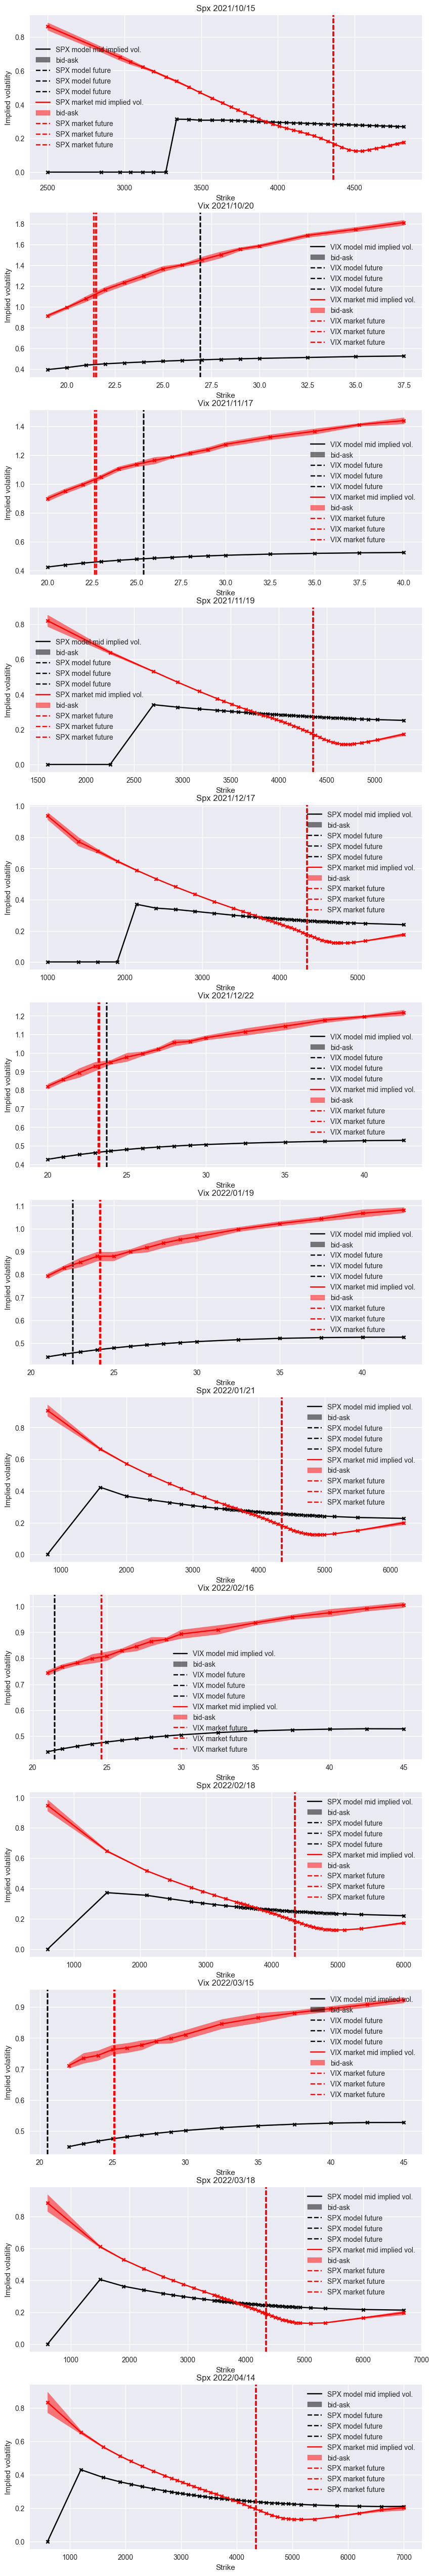

In [60]:
plot(files[-1])